In [5]:
!unzip 2021-ml-p5.zip

Archive:  2021-ml-p5.zip
  inflating: pca_test.csv            
  inflating: pca_train.csv           
  inflating: sample_submission.csv   
  inflating: train_label.csv         


In [82]:
import pandas as pd
import numpy as np

X = pd.read_csv('pca_train.csv')
print(X.shape)
X.head()

y = pd.read_csv('train_label.csv')
y = y.iloc[:, -1]
print(y.shape)
y.head()

#print(np.unique(y))

(27671, 256)
(27671,)


0    136
1     90
2    112
3    165
4     73
Name: label, dtype: int64

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify = y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(19369, 256)
(8302, 256)
(19369,)
(8302,)


In [113]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [114]:
from sklearn.preprocessing import MinMaxScaler
msc = MinMaxScaler()
X_train_m = msc.fit_transform(X_train)
X_test_m = msc.transform(X_test)

In [115]:
from sklearn.preprocessing import RobustScaler
rob = RobustScaler()
X_train_rob = rob.fit_transform(X_train)
X_test_rob = rob.transform(X_test)

In [116]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

clf = LinearDiscriminantAnalysis(solver='lsqr' , store_covariance = True)

clf.fit(X_train, y_train)
#y_train_pred = clf.predict(X_train)
#print(accuracy_score(y_train_pred, y_train))
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

clf.fit(X_train_std, y_train)
print(clf.score(X_train_std, y_train))
print(clf.score(X_test_std, y_test))

#clf.fit(X_train_m, y_train)
#print(clf.score(X_train_m, y_train))
#print(clf.score(X_test_m, y_test))

#clf.fit(X_train_rob, y_train)
#print(clf.score(X_train_rob, y_train))
#print(clf.score(X_test_rob, y_test))

0.6867158862099231
0.5917851120211998
0.6867158862099231
0.5917851120211998


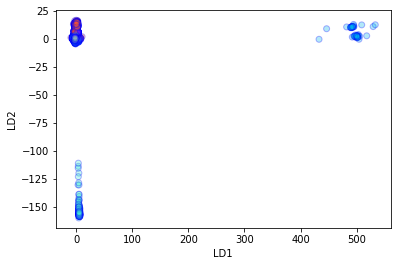

In [117]:
clf = LinearDiscriminantAnalysis(store_covariance = True)
X_lda = clf.fit_transform(X_train_std, y_train)

from matplotlib import pyplot as plt
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_lda[:, 0],
    X_lda[:, 1],
    c = y_train,
    cmap='rainbow',
    alpha=0.3,
    edgecolors='b'
)

In [40]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf = QuadraticDiscriminantAnalysis(store_covariance = True)

#clf.fit(X_train, y_train)
#print(clf.score(X_train, y_train))
#print(clf.score(X_test, y_test))

clf.fit(X_train_std, y_train)
print(clf.score(X_train_std, y_train))
print(clf.score(X_test_std, y_test))

#clf.fit(X_train_m, y_train)
#print(clf.score(X_train_m, y_train))
#print(clf.score(X_test_m, y_test))

#clf.fit(X_train_rob, y_train)
#print(clf.score(X_train_rob, y_train))
#print(clf.score(X_test_rob, y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


0.9988125354948629
0.3312454830161407


/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


0.9422272703805049
0.3312454830161407


/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


0.9422272703805049
0.3312454830161407


/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


0.9422272703805049
0.3312454830161407


In [61]:
test = pd.read_csv('pca_test.csv')

X_std = scaler.fit_transform(X)
test_std = scaler.transform(test)

In [70]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis(store_covariance = True)
clf.fit(X, y)
test_pred = clf.predict(test)

In [71]:
sample = pd.read_csv('sample_submission.csv')
sample.head()

,id,label
0,0,113
1,1,128
2,2,68
3,3,28
4,4,121


In [72]:
sample['label'] = test_pred
sample.head()

,id,label
0,0,113
1,1,128
2,2,68
3,3,28
4,4,121


In [73]:
sample.to_csv('sample_submission.csv', mode='w', index=False)